<a href="https://colab.research.google.com/github/brendanpshea/computing_concepts_python/blob/main/IntroCS_09_Data_and_Databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Intro to Data and Databases

In the ever-evolving digital age, we're surrounded by a colossal amount of information - so much so that it's become virtually impossible to comprehend its vastness without the aid of computers. This ocean of information is comprised of 'data', a term you're likely to hear frequently in the realm of computer science, and one that is the fundamental unit of our digital world. This chapter will introduce you to the concept of data, its types, and its critical role in computer science.

In any field, data serves as the basis for decision-making and problem-solving. For instance, meteorologists predict weather patterns based on historical climate data, marketers analyze consumer behavior data to tailor their advertising strategies, doctors make use of medical history data to diagnose and treat patients, and financial analysts forecast market trends using financial data. All these examples involve data analysis and interpretation, which are crucial components of computer science.

In computer science, we employ data in myriad ways: creating algorithms, designing software applications, and most notably, building and managing databases. But what exactly is a database? How does it organize vast amounts of data so efficiently? And how can we interact with a database to retrieve the information we need? To answer these questions, we delve into the world of databases and the language that we use to interact with them, Structured Query Language (SQL).

In this chapter, we'll explore what a database is, why it's an essential tool in handling data, and the various types of databases that exist. We'll also introduce you to SQL, discussing how to use it to retrieve data from a database efficiently. We'll primarily focus on SQL SELECT statements, which form the backbone of data retrieval in SQL.

Through this chapter, you'll not only learn about the concept and importance of data and databases but also acquire practical skills that are widely applicable in the field of computer science. By the end of it, you'll be well-equipped with the knowledge to navigate the world of data and databases and a newfound appreciation for the art and science of handling data in computer science.

## What is Data?
**Data** is a collection of facts in the form of words, numbers, images, or even more abstract concepts. It is raw and unprocessed information that, when processed or structured, can provide meaningful insights.  For example, if we record the daily temperature of a city, each recorded number is a piece of data. Another example might be the individual scores of students on a test, which can be processed to find the class average.

In the field of computer science, data is foundational and is the core subject of many, if not most, activities. It is the input to algorithms, the content stored and retrieved in databases, and the information transmitted across networks. Data is critical in a variety of fields and use cases, from decision-making in business environments to scientific research, from machine learning algorithms to web applications, and beyond.

Now, to further understand data, we can categorize it into two types: structured and unstructured data.

1.  **Structured Data:** This type of data is organized and formatted in a way that it's easily searchable in relational databases. Structured data adheres to a model that defines what fields of data exist and what types of data they hold. For example, an address book containing names, phone numbers, and addresses, where each piece of data has a certain type and is stored in a specific field.

2.  **Unstructured Data:** This type of data has no specific format or organization, making it more difficult to collect, process, and analyze. Examples of unstructured data include text files, images, videos, emails, social media posts, and web pages.

The importance of data in computer science cannot be overstated. It fuels the processes that drive decision-making algorithms, allows us to analyze and forecast trends, and forms the basis of machine learning and artificial intelligence. Understanding how to work with data - from basic data structures in programming languages to complex databases - is a crucial part of computer science education.

## What is a Database?
A **database** is a highly structured collection of data that is stored, managed, and accessed electronically. It's a systematic and organized way to store, retrieve, and manipulate data, facilitating efficient information management. In databases, data is organized into tables, each comprising rows and columns, forming a grid-like structure.

One common way to understand the value of databases is to contrast them with flat files. A **flat file** is a plain text or binary file that contains data but lacks the structured relationships between data elements that a database maintains. For example, you could store customer data in a flat file, with each line of the text file representing a customer and different pieces of information (like name, address, and phone number) separated by a delimiter such as a comma. This format is simple and can work for very small sets of data. Spreadsheets (like MS Excel or Google Docs) are examples of flat files.

However, as the volume of data grows, flat files become less practical. Retrieving specific information from a large flat file can be slow and resource-intensive. Furthermore, updating or modifying data in a flat file can be complex and prone to errors. Unlike databases, flat files don't support transactions (a logical unit of work that must either be entirely completed or entirely undone), concurrent access (multiple users accessing the data simultaneously), or constraints (rules governing the data), making data integrity and consistency harder to maintain.  On the other hand, databases are designed to manage, store, and retrieve large volumes of data efficiently. They are equipped with tools and functionalities to handle complex queries, support concurrent user access, ensure data consistency and security, and provide robust data recovery and backup systems.

Databases are designed around a database model, the most popular of which is the relational model. **Relational databases** organize data into tables (or relations), where each **table** represents an entity (like Customers, Orders, Products, etc.) and each row in the table represents a **record** or instance of that entity.  Many different types of relational databases are used today, each suited to different tasks:

1.  Microsoft Access: This is an entry-level, small-scale database management system (DBMS) provided by Microsoft. It's integrated with the Microsoft Office suite and is excellent for small-scale use by individuals, small businesses or departments within large organizations

2.  SQLite: SQLite is a self-contained, serverless, and zero-configuration database engine used widely in mobile apps and small to medium-sized applications written in languages like Python, C, or Java. It's renowned for its simplicity and lightweight footprint.

3.  Oracle Database and Microsoft SQL Server: These are proprietary, high-end, fully-featured DBMS. They is often used in large systems and for enterprise-level applications where performance, scalability, and reliability are crucial.

5.  PostgreSQL (and MySQL): Thse are full-featured open-source relational database systems with a strong reputation for reliability, data integrity, and correctness. MySQL has traditionally been the leader; however, PostgreSQL has rapidly made gains in recent year (after Oracle acquired partial control of MySQL).


Databases are an integral part of modern computing. Their structured nature allows efficient storage, retrieval, and manipulation of data, making them vital for a broad range of applications, from small scale applications like mobile apps to large, enterprise-level systems.

## Advantages of Databases over Flat Files
Databases have several advantages over flat files:

- *Efficient Storage:* Databases provide a highly efficient way to store large amounts of data. They allow us to organize data in a structured format, making it easier to manage. For example, a university might have a database that stores information about students, courses, and grades, all organized into separate tables for efficient storage.

- *Data Retrieval:* One of the significant advantages of databases is the ease with which we can retrieve data. Thanks to their structured format, we can quickly find and extract the information we need. Using our university example, if we want to find out all the courses a particular student has taken, we can easily retrieve this information from the database.

- *Data Management:* Databases also provide robust tools for managing data. They allow us to update data, enforce security measures, and ensure that the data remains consistent and accurate. In our university database, for instance, we could easily update a student's grade or add a new course.

- *Concurrency Control:* Databases allow multiple users to interact with the data simultaneously, ensuring that transactions are processed reliably and accurately, even when the database is being accessed concurrently by multiple users.

- *Data Protection:* Databases have built-in mechanisms for data backup and recovery, ensuring that data isn't lost in case of a failure.

In modern computing, databases are vital because they allow for the efficient handling of large amounts of data. They form the backbone of many applications, ranging from web and mobile applications to enterprise software systems. Understanding databases and how to interact with them is a crucial skill in computer science and many other fields.

## A Short Introduction to SQL
**Structured Query Language**, or **SQL**, is a programming language specifically designed for managing data held in a relational database management system (RDBMS). It is used for storing, manipulating, and retrieving data stored in databases.

The inception of SQL goes back to the 1970s. It was initially developed at IBM by Donald D. Chamberlin and Raymond F. Boyce. The language was originally called SEQUEL (Structured English Query Language) but was later shortened to SQL. The first commercial version was introduced by Oracle in 1979.

SQL is a little different from other programming languages. It's what we call a **declarative language**. This means that when you write SQL, you describe what you want without having to outline a detailed sequence of steps to get it. This is different from **procedural languages** like Python or C, where you provide the computer with step-by-step instructions.

Let's consider a simple example. Suppose you're playing a game of hide-and-seek with your friends. If your friend were a database, and you were trying to "query" your friend to find out where another friend was hiding, a procedural approach might involve asking a series of yes/no questions: "Are they hiding upstairs?", "Are they in a room with a window?", etc. In contrast, with a declarative approach like SQL, you would simply ask, "Where is our friend hiding?" SQL is designed to get the information you need in one question, without the need for a step-by-step process.

In practical terms, SQL is used for tasks like finding data that fits specific criteria, adding new data, updating or deleting existing data, and performing functions on the data such as adding it up or calculating averages. SQL is also used to create and modify the structure of databases themselves.

Understanding SQL is crucial for anyone who works with databases, as it is one of the few languages that is consistently used with virtually all types of databases. SQL has been around for a long time and continues to be widely used in the industry, which means learning SQL is a valuable skill that can open many doors in the tech field.

## Case Study: Database for Jedi Academy
In this case study, we will introduce the basic concepts of relational databases and SQL using the unique context of a Jedi Academy. We're dealing with a variety of intriguing characters, diverse Jedi training courses, and multifaceted relationships between students and their classes. To manage this intricate network of information, we'll be using a tool perfect for the job - a relational database.

A relational database allows us to store and manage data by organizing it into one or more **tables** (or **relations**). Each table represents a specific entity and stores relevant pieces of information about that entity, known as **attributes** (or **columns**). For the Jedi Academy, we'll create three tables:

1.  The `Students` table, representing all Jedi students. It will include each student's unique `StudentID` (an integer), `FirstName` and `LastName` (text strings, or `VARCHAR`), their `Level` (also an integer, indicating stages of Jedi training, such as 1 for Padawan, 2 for Knight, 3 for Master), and `GPA` (a float, for storing grade point average).

2.  The `Classes` table, representing different training courses. It will store the `ClassID` (an integer), `ClassName` (a text string or `VARCHAR`), `MasterName` (the name of the Jedi Master teaching the class, another `VARCHAR`), and the `RoomNumber` (another integer).

3.  The `Enrollment` table, representing the relationship between students and classes. It will include `StudentID`, `ClassID`, and `EnrollmentDate` (a `DATE`, for when the student enrolled in the class).

This database design allows us to efficiently manage and retrieve the academy's data. By leveraging SQL, we can quickly find out all classes a particular student is enrolled in, identify which students are under Master Yoda's tutelage, change the room of a class, and much more.

SQL uses several data types to define what kind of data each column in a table can store. For instance, `INTEGER` is used for whole numbers, `VARCHAR` for text strings, `FLOAT` for decimal numbers, and `DATE` for dates. Choosing the correct data type is crucial to maintaining data integrity, optimizing storage, and enabling accurate operations and comparisons.

As we proceed through this case study, we'll be delving deeper into these data types, learning to harness the power of SQL, and exploring how it brings organization and accessibility to our Jedi Academy's database.

## Setting Up SQLite Database in Jupyter Notebook

Before we start creating tables, we need to set up our database. For this case study, we'll be using **SQLite**, a simple yet powerful database engine, through a Jupyter Notebook. To interact with SQLite using SQL commands directly in the notebook, we'll using **SQL Magic**.  We can do this by running the following cell:

In [43]:
# Load "SQL Magic"
%load_ext sql

# Create a Database
%sql sqlite:///jedi_academy.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


### Creating Tables with SQL

Now that we've planned our Jedi Academy database, it's time to put our ideas into action. SQL allows us to create tables using the CREATE TABLE statement. Let's see how we can define our Students, Classes, and Enrollment tables.

#### Creating the Students table
Here is the SQL statement to create the `Students` table:

In [45]:
%%sql

-- Delete table if it already exists
DROP TABLE IF EXISTS Students;

--Create the new table
CREATE TABLE Students (
    StudentID INT PRIMARY KEY,
    FirstName VARCHAR(50),
    LastName VARCHAR(50),
    Level INT,
    GPA FLOAT
);


 * sqlite:///jedi_academy.db
Done.
Done.


[]

In this statement, `CREATE TABLE Students` tells SQL that we want to create a new table named `Students`. Each line inside the parentheses defines a column in our table, with its name and its data type. For example, `StudentID INT` creates a column named `StudentID` that will store integers.

`PRIMARY KEY` is a constraint that we've added to `StudentID` to tell SQL that this column will uniquely identify each record in our table. In other words, there cannot be two students with the same `StudentID`.

#### Creating the `Classes` table

Next, let's create our `Classes` table:

In [47]:
%%sql
-- Drop the table if it already exists
DROP TABLE IF EXISTS Classes;

-- Now, create the table
CREATE TABLE Classes (
    ClassID INT PRIMARY KEY,
    ClassName VARCHAR(100),
    MasterName VARCHAR(50),
    RoomNumber INT
);


 * sqlite:///jedi_academy.db
Done.
Done.


[]

This statement is similar to the first, but creates a table named `Classes` with its own unique columns. The `ClassID` column is the primary key here, so each class must have a unique `ClassID`.

#### Creating the `Enrollment` table

Finally, we'll create the `Enrollment` table:

In [48]:
%%sql
--Drop old table (if it exists)
DROP TABLE IF EXISTS Enrollment;

--Create the table
CREATE TABLE Enrollment (
    StudentID INT,
    ClassID INT,
    EnrollmentDate DATE,
    PRIMARY KEY (StudentID, ClassID),
    FOREIGN KEY (StudentID) REFERENCES Students(StudentID),
    FOREIGN KEY (ClassID) REFERENCES Classes(ClassID)
);


 * sqlite:///jedi_academy.db
Done.
Done.


[]


In the `Enrollment` table, we have two primary keys, `StudentID` and `ClassID`. This is known as a composite primary key, and it ensures that a student can only be enrolled in each class once. The combination of `StudentID` and `ClassID` must be unique for each record.

Also, you'll notice that `StudentID` and `ClassID` are also foreign keys, referencing `StudentID` in the `Students` table and `ClassID` in the `Classes` table respectively. This is how we establish relationships between our tables in SQL.

By creating these three tables, we have successfully set up a basic structure for our Jedi Academy's database. In the next sections, we'll populate these tables with data and learn how to manipulate it.

## An Entity Relationship Diagram for the Jedi Academy
We often use **Entity-Relationship Diagrams (ERDs)** to depict the logical/conceptual structure of databases. Here is a "Crow's foot" style diagram of our database right now.


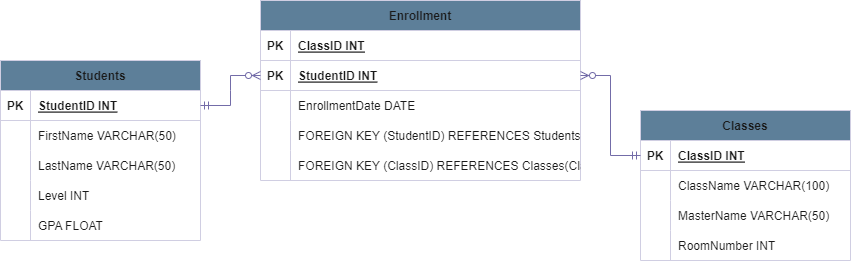

### Inserting Data into Tables with SQL

Having established the structure of our tables, we now turn to populating them with data. We'll use the `INSERT INTO` statement for this purpose. Let's begin with our `Students` and `Classes` tables.

#### Inserting data into the `Students` table

We can insert data into the `Students` table with a statement that looks like this:

```sql
INSERT INTO Students (StudentID, FirstName, LastName, Level, GPA)
VALUES (1, 'Anakin', 'Skywalker', 3, 3.8);
```

This statement adds a single row to our table. It begins with `INSERT INTO Students`, which tells SQL that we want to insert data into the `Students` table. The names in parentheses (`StudentID`, `FirstName`, `LastName`, `Level`, `GPA`) are the columns we're inserting data into. The `VALUES` keyword is followed by the values we're inserting, in the same order as the column names.

Now, let's add data for 10 students:

In [49]:
%%sql

INSERT INTO Students (StudentID, FirstName, LastName, Level, GPA)
VALUES (1, 'Anakin', 'Skywalker', 3, 3.8),
       (2, 'Grogu', '', 3, 3.9),
       (3, 'Luke', 'Skywalker', 2, 3.7),
       (4, 'Leia', 'Organa', 2, 4.0),
       (5, 'Rey', 'Skywalker', 1, 3.2),
       (6, 'Chewbacca', 'Wookiee', 1, 3.5),
       (7, 'Mara', 'Jade', 3, 4.0),
       (8, 'Mace', 'Windu', 3, 3.8),
       (9, 'Padme', 'Amidala', 1, 3.7),
       (10, 'Qui-Gon', 'Jinn', 3, 3.9);


 * sqlite:///jedi_academy.db
10 rows affected.


[]

## Inserting data into the Classes table
Inserting data into the `Classes` table is similar. Here's how we insert data for one class:

```sql
INSERT INTO Classes (ClassID, ClassName, MasterName, RoomNumber)
VALUES (1, 'Lightsaber 101', 'Yoda', 101);
```
And now, let's add data for 3 classes:

In [50]:
%%sql

INSERT INTO Classes (ClassID, ClassName, MasterName, RoomNumber)
VALUES (1, 'Lightsaber 101', 'Yoda', 101),
       (2, 'Advanced Force Techniques', 'Obi-Wan Kenobi', 102),
       (3, 'Interstellar Diplomacy', 'Padme Amidala', 103);


 * sqlite:///jedi_academy.db
3 rows affected.


[]

#### Inserting Data into the `Enrollment` Table

Let's enroll our Jedi students in their classes. The process to insert data into the `Enrollment` table is similar to what we did with `Students` and `Classes`.

Remember that the `Enrollment` table uses a composite primary key, consisting of `StudentID` and `ClassID`. This combination uniquely identifies each row and ensures a student can only be enrolled in each class once.

Here's an example of how we might enroll the student with `StudentID` 1 in the class with `ClassID` 1:

```sql
INSERT INTO Enrollment (StudentID, ClassID, EnrollmentDate)
VALUES (1, 1, '2123-01-01');
```

The date is given in the format 'YYYY-MM-DD'. This particular statement enrolls Anakin Skywalker in 'Lightsaber 101' as of January 1, 2123.

Now, let's insert several more enrollment records:

In [51]:
%%sql

INSERT INTO Enrollment (StudentID, ClassID, EnrollmentDate)
VALUES (1, 2, '2123-01-01'),
       (2, 1, '2123-01-01'),
       (3, 1, '2123-01-02'),
       (3, 2, '2123-01-02'),
       (4, 2, '2123-01-02'),
       (4, 3, '2123-01-02'),
       (5, 1, '2123-01-03'),
       (6, 1, '2123-01-03'),
       (7, 2, '2123-01-03'),
       (8, 3, '2123-01-03'),
       (9, 3, '2123-01-04'),
       (10, 2, '2123-01-04');


 * sqlite:///jedi_academy.db
12 rows affected.


[]

## `SELECT` Data We Want to See

Once we have data in our tables, we typically want to retrieve it for various purposes. This is where SQL's `SELECT` statement comes in. `SELECT` allows us to query our database, extracting information according to our needs.

A simple query might involve retrieving all data from a single table. For instance, to select all records from the `Students` table, we use the following command:

In [ ]:
%%sql
SELECT * FROM Students;

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
1,Anakin,Skywalker,3,3.8
2,Grogu,,3,3.9
3,Luke,Skywalker,2,3.7
4,Leia,Organa,2,4.0
5,Rey,Skywalker,1,3.2
6,Chewbacca,Wookiee,1,3.5
7,Mara,Jade,3,4.0
8,Mace,Windu,3,3.8
9,Padme,Amidala,1,3.7
10,Qui-Gon,Jinn,3,3.9


In this query, the `SELECT` keyword tells the database to select data from a table. The `*` symbol tells the database to select all columns from the table. The `FROM` keyword tells the database which table to select data from. In this case, the table is `Students`.  So, this query returns all rows and all columns from the `Students` table. This means that the query will return all of the student data, such as the student's name, student ID, major, GPA, etc. The query breaks down as follows:

-   `SELECT`: This is the keyword that tells the database to select data from a table.
-   `*`: This is the asterisk symbol, which tells the database to select all columns from the table.
-   `FROM`: This is the keyword that tells the database which table to select data from.
-   `Students`: This is the name of the table that we want to select data from.


## `SELECT` Specific Columns
We could also select specific columns. For example, to get just the first and last names of all students, we would write:

In [ ]:
%%sql
SELECT FirstName, LastName FROM Students;


 * sqlite:///jedi_academy.db
Done.


FirstName,LastName
Anakin,Skywalker
Grogu,
Luke,Skywalker
Leia,Organa
Rey,Skywalker
Chewbacca,Wookiee
Mara,Jade
Mace,Windu
Padme,Amidala
Qui-Gon,Jinn


## Filtering Data With `WHERE`.
The `WHERE` clause allows us to filter our query based on certain conditions. For instance, to find all students at Level 3 (Jedi Masters), we could use:

In [ ]:
%%sql
SELECT * FROM Students WHERE Level = 3;

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
1,Anakin,Skywalker,3,3.8
2,Grogu,,3,3.9
7,Mara,Jade,3,4.0
8,Mace,Windu,3,3.8
10,Qui-Gon,Jinn,3,3.9


In this query:
-   `SELECT *`: This part of the query selects all columns for each row that satisfies the condition in the `WHERE` clause.

-   `FROM Students`: This specifies the table (`Students`) from which the data is to be retrieved.

-   `WHERE Level = 3`: This is a condition that filters the rows to only include those where the `Level` is equal to 3.

Together, this query will retrieve all columns for students whose `Level` is 3 in the `Students` table.

### More Usage of WHERE

The `WHERE` clause can be used in various ways to filter records. Here are some examples:

#### Comparisons

You can use comparison operators like `<`, `>`, `<=`, `>=`.

In [ ]:
%%sql
SELECT * FROM Students WHERE GPA > 3.0;

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
1,Anakin,Skywalker,3,3.8
2,Grogu,,3,3.9
3,Luke,Skywalker,2,3.7
4,Leia,Organa,2,4.0
5,Rey,Skywalker,1,3.2
6,Chewbacca,Wookiee,1,3.5
7,Mara,Jade,3,4.0
8,Mace,Windu,3,3.8
9,Padme,Amidala,1,3.7
10,Qui-Gon,Jinn,3,3.9


### Logical Operators

You can use `AND`, `OR`, and `NOT` to combine multiple conditions.

In [ ]:
%sql SELECT * FROM Students WHERE Level = 3 AND GPA > 3.0;

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
1,Anakin,Skywalker,3,3.8
2,Grogu,,3,3.9
7,Mara,Jade,3,4.0
8,Mace,Windu,3,3.8
10,Qui-Gon,Jinn,3,3.9


In [ ]:
%sql SELECT * FROM Students WHERE Level = 3 OR GPA > 3.0;

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
1,Anakin,Skywalker,3,3.8
2,Grogu,,3,3.9
3,Luke,Skywalker,2,3.7
4,Leia,Organa,2,4.0
5,Rey,Skywalker,1,3.2
6,Chewbacca,Wookiee,1,3.5
7,Mara,Jade,3,4.0
8,Mace,Windu,3,3.8
9,Padme,Amidala,1,3.7
10,Qui-Gon,Jinn,3,3.9


In [ ]:
%sql SELECT * FROM Students WHERE NOT (Level = 3);

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
3,Luke,Skywalker,2,3.7
4,Leia,Organa,2,4.0
5,Rey,Skywalker,1,3.2
6,Chewbacca,Wookiee,1,3.5
9,Padme,Amidala,1,3.7


### `IN` Clause

Use `IN` to match any value in a list.

In [ ]:
%sql SELECT * FROM Students WHERE Level IN (2, 4);

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
3,Luke,Skywalker,2,3.7
4,Leia,Organa,2,4.0


## Sorting with `ORDER BY` Clause
We can sort our results using the `ORDER BY` clause. For instance, to get a list of students sorted by GPA in descending order, we would write:

In [ ]:
%%sql
SELECT * FROM Students ORDER BY GPA DESC;

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
4,Leia,Organa,2,4.0
7,Mara,Jade,3,4.0
2,Grogu,,3,3.9
10,Qui-Gon,Jinn,3,3.9
1,Anakin,Skywalker,3,3.8
8,Mace,Windu,3,3.8
3,Luke,Skywalker,2,3.7
9,Padme,Amidala,1,3.7
6,Chewbacca,Wookiee,1,3.5
5,Rey,Skywalker,1,3.2


We can aslo sort in ascending order (the default) like this:

In [ ]:
%%sql
SELECT * FROM Students ORDER BY GPA ASC;

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
5,Rey,Skywalker,1,3.2
6,Chewbacca,Wookiee,1,3.5
3,Luke,Skywalker,2,3.7
9,Padme,Amidala,1,3.7
1,Anakin,Skywalker,3,3.8
8,Mace,Windu,3,3.8
2,Grogu,,3,3.9
10,Qui-Gon,Jinn,3,3.9
4,Leia,Organa,2,4.0
7,Mara,Jade,3,4.0


#### NATURAL JOIN

Often, we'll want to combine data from two or more tables. This is done using a `JOIN`. A `NATURAL JOIN` is a type of join operation that directly matches columns between tables that have the same column name, and returns only one copy of each duplicate column.

For example, to list all students along with the classes they're enrolled in, we would use:



In [ ]:
%%sql

SELECT Students.FirstName, Students.LastName, Classes.ClassName
FROM Students
NATURAL JOIN Enrollment
NATURAL JOIN Classes


 * sqlite:///jedi_academy.db
Done.


FirstName,LastName,ClassName
Anakin,Skywalker,Advanced Force Techniques
Grogu,,Lightsaber 101
Luke,Skywalker,Lightsaber 101
Luke,Skywalker,Advanced Force Techniques
Leia,Organa,Advanced Force Techniques
Leia,Organa,Interstellar Diplomacy
Rey,Skywalker,Lightsaber 101
Chewbacca,Wookiee,Lightsaber 101
Mara,Jade,Advanced Force Techniques
Mace,Windu,Interstellar Diplomacy


This statement will return a result set that includes the `FirstName` and `LastName` from the `Students` table and the `ClassName` from the `Classes` table.

The `NATURAL JOIN` keyword implicitly joins `Students` and `Enrollment` on the `StudentID` column (because it is common between these two tables) and then joins that result with `Classes` on the `ClassID` column (since it is common between `Enrollment` and `Classes`).

In other words, this query is giving us a list of students along with the names of the classes they are enrolled in.

Note: It's important to be careful with `NATURAL JOIN`s, as they automatically match all columns with the same name between the tables. If your tables have any column names in common that aren't meant to be related, you may get unexpected results.

#### COUNT

The `COUNT` function returns the number of rows that matches a specified criterion. It is often used with the `SELECT` statement. For example, to find out how many students are enrolled in the Jedi Academy, we would use:

In [ ]:
%%sql
SELECT COUNT(*) FROM Students;


 * sqlite:///jedi_academy.db
Done.


COUNT(*)
10


#### LIKE Operator
The `LIKE` operator is used in a WHERE clause to search for a specified pattern in a column. For example, to find all students whose names start with 'A', we would use:

In [ ]:
%%sql
SELECT * FROM Students WHERE FirstName LIKE 'A%';

 * sqlite:///jedi_academy.db
Done.


StudentID,FirstName,LastName,Level,GPA
1,Anakin,Skywalker,3,3.8


#### `GROUP BY` and `HAVING`
`GROUP BY` is a clause in SQL that is used to arrange identical data into groups. The HAVING clause is used instead of WHERE with GROUP BY to filter the groups based on a condition.

For example, if we want to know how many students are enrolled in each class, we could use:

In [ ]:
%%sql
SELECT Classes.ClassName, COUNT(*) AS NumberOfStudents
FROM Students
NATURAL JOIN Enrollment
NATURAL JOIN Classes
GROUP BY Classes.ClassID;


 * sqlite:///jedi_academy.db
Done.


ClassName,NumberOfStudents
Lightsaber 101,4
Advanced Force Techniques,5
Interstellar Diplomacy,3


This statement groups the result by ClassID, and for each group, it counts the number of students.

If we wanted to filter this result to show only classes with more than four students, we would add a `HAVING` clause:

In [ ]:
%%sql
SELECT Classes.ClassName, COUNT(*) AS NumberOfStudents
FROM Students
NATURAL JOIN Enrollment
NATURAL JOIN Classes
GROUP BY Classes.ClassID
HAVING COUNT(*) > 4;


 * sqlite:///jedi_academy.db
Done.


ClassName,NumberOfStudents
Advanced Force Techniques,5


### Additional SQL Functions

SQL is not just about creating tables and retrieving data. It also has a rich set of built-in functions to perform calculations or operations on your data. In this section, we'll learn about a few of these: AVG, SUM, MIN, MAX, and DISTINCT.

### AVG
The `AVG` function calculates the average of a set of values. For example, if you want to find out the average GPA of all students at the Jedi Academy, you would use:

In [ ]:
%%sql
SELECT AVG(GPA) FROM Students;

 * sqlite:///jedi_academy.db
Done.


AVG(GPA)
3.75


#### SUM
The `SUM` function calculates the total sum of a numeric column. For example, to find the total level of all students (i.e., the sum of all student levels), you would use:

In [ ]:
%%sql
SELECT SUM(Level) FROM Students;

 * sqlite:///jedi_academy.db
Done.


SUM(Level)
22


#### MIN and MAX
`MIN` and `MAX` functions return the smallest and largest value in a set of values, respectively. For instance, to find the students with the lowest and highest GPAs, we would use:

In [ ]:
%%sql
SELECT MIN(GPA), MAX(GPA) FROM Students;


 * sqlite:///jedi_academy.db
Done.


MIN(GPA),MAX(GPA)
3.2,4.0


#### DISTINCT
The DISTINCT keyword is used in conjunction with SELECT to eliminate all the duplicate records and fetch only the unique ones. Let's say we want to see all the unique levels of students. We can achieve this using the DISTINCT keyword as follows:

In [ ]:
%%sql
SELECT DISTINCT Level FROM Students;

 * sqlite:///jedi_academy.db
Done.


Level
3
2
1


Remember, SQL functions offer much more than just these. They can be extremely powerful in processing large amounts of data directly in the database without requiring additional processing in your application or software.

## Table: Basic SQL Commands

| SQL Command | Description |
| --- | --- |
| `CREATE TABLE Cars (Model VARCHAR(50), Year INT);` | SQL query to create a table (Cars) with a string attribute ('Model') and an integer attribute ('Year'). |
| `INSERT INTO Cars (Model, Year) VALUES ('Tesla Model 3', 2020);` | SQL query to insert a new row into the table (Cars) with values for attributes 'Model' ("Tesla Model 3") and 'Year' (2020). |
| `SELECT * FROM Animals;` | SQL query to retrieve all rows and attributes from the table (Animals). |
| `SELECT Name, Species FROM Animals;` | SQL query to retrieve attributes 'Name' and 'Species' from all rows in the table (Animals). |
| `SELECT * FROM Students WHERE GPA = 4.0;` | SQL query to retrieve all rows from the table (Students) where the attribute 'GPA' is 4.0. |
| `SELECT * FROM Beer WHERE Brand LIKE '%IPA%';` | SQL query to retrieve all rows from the table (Beer) where the attribute 'Brand' contains the string 'IPA'. |
| `SELECT COUNT(*) FROM Cars;` | SQL query to count the total number of rows in the table (Cars). |
| `SELECT Major, COUNT(*) FROM Students GROUP BY Major;` | SQL query to count the number of rows in the table (Students) for each unique value in the attribute 'Major'. |
| `SELECT Type, COUNT(*) FROM Beer GROUP BY Type HAVING COUNT(*) > 1;` | SQL query to count the number of rows in the table (Beer) for each unique value in the attribute 'Type', only including groups with more than one row. |
| `INSERT INTO Animals (Name, Species) VALUES ('Fido', 'Dog');` | SQL query to insert another new row into the table (Animals) with different values for the attributes 'Name' and 'Species'. |
| `SELECT * FROM Students WHERE Major LIKE 'Compu%';` | SQL query to retrieve all rows from the table (Students) where the attribute 'Major' starts with the string 'Compu'. |
| `SELECT * FROM Cars WHERE Year > 2010;` | SQL query to retrieve all rows from the table (Cars) where the attribute 'Year' is greater than 2010. |
| `SELECT * FROM Beer ORDER BY Alcohol_Content;` | SQL query to retrieve all rows from the table (Beer), ordered by the attribute 'Alcohol_Content' in ascending order. |
| `SELECT * FROM Animals ORDER BY Species DESC;` | SQL query to retrieve all rows from the table (Animals), ordered by the attribute 'Species' in descending order. |
| `SELECT Major, AVG(GPA) FROM Students GROUP BY Major;` | SQL query to find the average of the attribute 'GPA' in the table (Students) for each unique value in the attribute 'Major'. |
| `SELECT Type, SUM(Alcohol_Content) FROM Beer GROUP BY Type;` | SQL query to find the sum of the attribute 'Alcohol_Content' in the table (Beer) for each unique value in the attribute 'Type'. |
| `SELECT Species, MIN(Age) FROM Animals GROUP BY Species;` | SQL query to find the minimum of the attribute 'Age' in the table (Animals) for each unique value in the attribute 'Species'. |
| `SELECT Year, MAX(Price) FROM Cars GROUP BY Year;` | SQL query to find the maximum of the attribute 'Price' in the table (Cars) for each unique value in the attribute 'Year'. |
| `SELECT DISTINCT Major FROM Students;` | SQL query to retrieve all distinct values of the attribute 'Major' from the table (Students). |

## Exercises: Basic SQL
Here are some exercises for you to try out. (Some of these appear earlier in the document, but try to do them wihout looking!).

1.  Insert a New Student: Add a new student named 'Obi-Wan Kenobi' with a level of 3 and a GPA of 3.8 into the 'Students' table.

2.  Retrieve Specific Data: Fetch the 'FirstName' and 'LastName' of all students who are at Level 2.

3.  Add a New Class: Create a new class named 'Force 101' and add it to the 'Classes' table.

4.  Enroll a Student: Enroll 'Obi-Wan Kenobi' in 'Force 101'. Make sure the 'Enrollment' table is updated accordingly.

5.  Count the Students: Find out how many students are enrolled at the Jedi Academy.

6.  Find Average GPA: Calculate the average GPA of all students at the Jedi Academy.

7.  Student with Highest GPA: Find out who has the highest GPA in the academy. Is it 'Obi-Wan Kenobi'?

8.  Students in a Class: Find out the names of all students enrolled in 'Force 101'.

9.  Find Unique Levels: Use the DISTINCT keyword to find all unique Levels that the students of Jedi Academy are in.

10. Classes per Student: Count the number of classes each student is enrolled in.

In [ ]:
%%sql
-- Query 1:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 2:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 3:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 4:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 5:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 6:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 7:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 8:

 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 9:


 * sqlite:///jedi_academy.db
Done.


[]

In [ ]:
%%sql
-- Query 10:

 * sqlite:///jedi_academy.db
Done.


[]

### Case Study: Database Design and Deployment in Star Wars

Welcome to the next phase of your journey in understanding databases. So far, we've dabbled in the basics of SQL, learning how to query, filter, and sort data. We've mastered the `SELECT` statement, delved into the `WHERE` clause, and even learned to put things in order with `ORDER BY`. You've become proficient in using SQL to interact with existing databases, but now we're going to dig deeper. The universe of databases is vast, and we've barely scratched the surface.

For this case study, Imagine you are tasked with designing a database for the Galactic Empire. The stakes are high; the Empire needs to keep track of planets, rebel activity, starship deployments, and more. On the other side, the Rebel Alliance also needs a database for their ragtag fleet and undercover operations. Whether you're Team Empire or Team Rebellion, you'll need to think critically about how to structure your data to ensure efficient queries, secure data storage, and accurate information retrieval.

Through this case study, we will address key principles of database design and deployment, including:

1.  Conceptual Modeling: What are the primary components in the Star Wars universe, and how do they interact?

2.  Physical Modeling: How can we "translate" this conceptual model to the language of SQL?

3.  Securing the Database: How would the Empire protect its data? What security measures should the Rebels take?

4.  Deployment Considerations: How do you decide which database engine to use, and what are some considerations for scalability and performance?

By the end of this case study, you'll have a well-rounded understanding of the core concepts that underpin database design and deployment. You'll be equipped with the skills to tackle real-world problems---whether in this galaxy or one far, far away.

### Conceptual Modeling

Imagine you have a crucial role in the Rebel Alliance---you're tasked with overseeing an elite X-wing squadron. Your primary challenge lies not just in outmaneuvering the Empire, but also in managing an immense amount of data effectively. Whether it's pilot expertise or mission details, every piece of information can be pivotal. To confront the Empire's vast resources and superior data management capabilities, you must create an impeccably designed database.

**Business Rules: Setting the Operational Guidelines.** Before we dive into the nitty-gritty of database design, it's important to lay down the "business rules" or operational guidelines that your X-wing squadron must adhere to. Think of business rules as the "laws" of your organizational universe---they establish the policies, procedures, and constraints that your database design must respect. For instance, you'll need rules to clarify how many pilots can fly a single X-wing, what each mission should entail, and how to handle equipment. The business rules will act as a blueprint for identifying entities, attributes, and relationships. Some rules might be:

-   Each X-wing is piloted by one pilot.
-   Pilots may fly different X-wings for different missions.
-   Each mission may involve multiple pilots and multiple X-wings.
-   Equipment is assigned to X-wings, not pilots.
-   Each mission has a specific objective and is categorized by its level of urgency.

**Entities: The Building Blocks of Your Universe.** Once your business rules are clear, the next step is to identify the primary entities---the key "things" or "objects" your database must keep track of. In the Star Wars universe, this could be anything from lightsabers to Wookiees, but in our specific context of an X-wing squadron, you might focus on Pilots, X-Wings, Missions, Bases, and Equipment. Identifying these entities is crucial because they will become the tables in your database.

**Attributes: Defining Characteristics of Your Entities**. Attributes are essentially the details or characteristics that describe each entity. Think of them as the columns in each table of your database. For a 'Pilot' entity, the attributes could include name, rank, and level of experience. For an 'X-Wing,' you might want to include the model, serial number, and current operational status. The attributes you choose should align with the business rules and what you need to achieve operationally for each entity. Some more detailed attributes might be:

-   Pilots: Name, Rank, Experience Level
-   X-Wings: Model, Serial Number, Status (Operational/In Repair)
-   Missions: Code Name, Objective, Urgency Level
-   Bases: Location, Capacity, Security Level
-   Equipment: Type, Status, Compatible Models

**Relationships: Making Connections Between Entities.** Understanding the relationships between entities is key to creating an efficient database. Relationships map out how one entity interacts with another, helping you understand where to use primary and foreign keys in your tables. In our X-wing squadron, we have various types of relationships such as One-to-One, One-to-Many, and Many-to-Many. For example:

-   Pilots-to-X-Wings: One-to-Many (Each pilot can fly multiple X-wings, but each X-wing is flown by one pilot at a time)
-   Pilots-to-Missions: Many-to-Many (Pilots can go on multiple missions and missions can have multiple pilots)
-   Missions-to-Bases: Many-to-One (Missions are launched from a base, but one base can launch multiple missions)
-   X-Wings-to-Equipment: One-to-Many (Each X-wing can have multiple pieces of equipment)

With a keen understanding of these core components---business rules, entities, attributes, and relationships---you will be well-equipped to embark on the journey of designing a database that can effectively manage an X-wing squadron. These foundational concepts will pave the way for more advanced topics like database normalization, primary and foreign keys, security, and deployment considerations. So, may the Force---along with these robust database design principles---be with you!

### Physical Modeling: Turning Concepts into SQL Code

Now that we have a good grasp of the conceptual model, let's delve into how to translate that into SQL code, which is a part of physical modeling. This phase involves several tasks, including deciding on data types, specifying primary and foreign keys, and addressing many-to-many relationships. Physical modeling turns your conceptual ideas into a working database, ready to take on the challenges of the Rebel Alliance.

#### Choosing Data Types: The Nitty-Gritty of Storage

SQL databases come with a variety of data types that help you define the kind of information each attribute will store. The data types you choose must align with the business rules and the nature of the data itself. For example, a pilot's name could be stored as `VARCHAR(50)`, while their experience level might be best represented as an `INT`.

Here's how you might define some of the entities in SQL, with relevant data types:


In [53]:
%%sql
--Let's drop the table in case we already created it
DROP TABLE IF EXISTS Pilots;

--Now, create the table
CREATE TABLE Pilots (
    PilotID INT PRIMARY KEY,
    Name VARCHAR(50),
    Rank VARCHAR(20),
    ExperienceLevel INT
);

 * sqlite:///jedi_academy.db
Done.
Done.


[]

In [54]:
%%sql
--Let's drop the table in case we already created it
DROP TABLE IF EXISTS X_Wings;

--Now, create the table
CREATE TABLE X_Wings (
    XWingID INT PRIMARY KEY,
    Model VARCHAR(20),
    SerialNumber VARCHAR(30),
    Status VARCHAR(32) CHECK (Status IN ("Operational", "Maintenance"))
);

 * sqlite:///jedi_academy.db
Done.
Done.


[]

### Primary and Foreign Keys: Creating Uniqueness and Relationships

A primary key uniquely identifies each record in a table and must contain a unique value. A foreign key, on the other hand, is used to link two tables together. It references the primary key in another table, thereby establishing a relationship between them.

Using our X-wing squadron example, `PilotID` and `XWingID` could be primary keys for the `Pilots` and `X_Wings` tables, respectively. If we have a `Missions` table, we might use a `MissionID` as its primary key and include `PilotID` and `XWingID` as foreign keys to establish relationships.


In [58]:
%%sql
--Let's drop the table in case we already created it
DROP TABLE IF EXISTS Missions;

CREATE TABLE Missions (
    MissionID INT PRIMARY KEY,
    CodeName VARCHAR(50),
    Objective TEXT,
    UrgencyLevel VARCHAR(10)
      CHECK (UrgencyLevel IN ('Low', 'Medium', 'High')),
    PilotID INT,
    XWingID INT,
    FOREIGN KEY (PilotID) REFERENCES Pilots(PilotID),
    FOREIGN KEY (XWingID) REFERENCES X_Wings(XWingID)
);

 * sqlite:///jedi_academy.db
Done.
Done.


[]

With these physical modeling steps, you can see how the conceptual framework starts to take shape in the form of actual SQL code. By carefully choosing data types, designating primary and foreign keys, and resolving many-to-many relationships, you transform your conceptual ideas into a functional database. This transformation enables you to execute the intricate operations of your X-wing squadron effectively, making you a true asset to the Rebel Alliance.

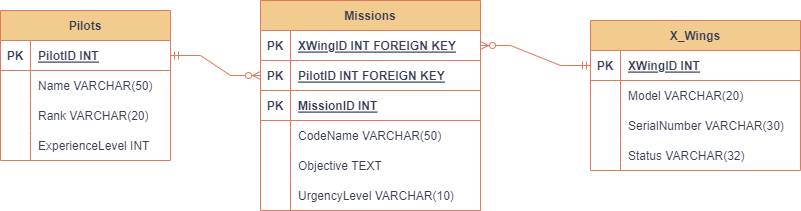

### Choosing an RDBMS

A **Relational Database Management System (RDBMS)** is a software system that provides an interface to interact with databases, allowing you to perform actions like querying, updating, or inserting data. SQL (Structured Query Language) is the standard language used for interacting with an RDBMS. Just as Galactic Basic is the common language spoken across different planets and species in the Star Wars universe, SQL serves as a universally accepted set of commands for interacting with any RDBMS. While each RDBMS has small quirks, what you've learned in this chapter should apply to nearly all of them.

#### Serverless vs. Server-Client Databases: The Battle Scenarios

In a **serverless database** like SQLite (what we've been using so far), the database engine runs within the application itself. There's no need for a separate, central server to manage interactions with the database. Think of it like the personal datapads used by Rebel spies. Lightweight and portable, they contain all the essential information for a single operative to perform a mission but are not intended for coordinating a full-scale assault on the Death Star.

Serverless databases are suitable for small-scale applications, mobile apps, and educational projects. They are the best fit when you need something lightweight and easy to set up, with minimal configuration. If you're a lone Jedi or a small Rebel cell planning minor operations, a serverless database may be all you need. They are a great way to store data in your Python (or Java, C, etc.) applications, and are bundled by default with many modern programming languages (including Python).

In contrast, **server-client databases** like PostgreSQL, MySQL, Oracle, and SQL Server operate on a central server. These are the equivalent of the mainframe computers at Rebel bases, designed to handle galaxy-wide operations and capable of supporting multiple users and complex queries. If you're running large, coordinated missions that require multiple levels of hierarchy, advanced features, and high availability---like the Rebel fleet attacking the second Death Star---a server-client RDBMS is more appropriate. These databases are designed for scalability and can accommodate complex operations, making them ideal for mid-to-large-scale applications.


####  Open-Source vs. Proprietary: The Galactic Choice

**Open-source databases** like SQLite and PostgreSQL are the rebels of the database world. They're community-driven, free to use, and adaptable. Much like the Rebellion, which operates on shared principles and contributions from various species and systems, open-source databases benefit from a community of developers contributing to their improvement and extension. Open-source options are suitable for organizations that are cost-sensitive and can benefit from community support. Think of scrappy Rebel groups pooling their resources to fight the Empire.

**Proprietary databases** like Oracle and Microsoft SQL Server are on the other side of the spectrum. These are the Imperial Star Destroyers of databases---highly efficient, extremely powerful, but also costly. They come with licensing fees and a structured environment that you must adhere to.  If you're running an organization that requires a high level of security, advanced features, and you have the resources for it---akin to the Empire's well-funded and tightly controlled operations---a proprietary database might be the way to go.

### Questions: Databases in Star Wars
1. In the context of the Rebel Alliance, what additional entities might you consider crucial, beyond Pilots, X-Wings, Missions, Bases, and Equipment? Explain how these entities could be important for the Rebellion's success against the Empire.

2. Discuss the business rules in place for the X-wing squadron. What additional operational guidelines should be considered to enhance mission success rates and operational efficiency? How might these rules vary if you were designing a database for the Galactic Empire instead?

3. How would the Empire and the Rebel Alliance differ in their approaches to database security? Given the covert nature of the Rebel Alliance and the authoritative nature of the Empire, what specific security measures would each side prioritize? (Follow up: How does this matter in the real world?)

4. From which sorts of projects or scenarios would an open-source or proprietary database be more suitable? Consider factors like cost, community support, and customization in your discussion.

## My Answers: Databases in Star Wars
1.

2.

3.

4.

5.

## Review WIth Quizlet
Run the following cell to launch the Quizlet review.

In [ ]:
%%html
<iframe src="https://quizlet.com/821793896/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## Glossary
| Term | Definition |
| --- | --- |
| Data | Raw, unprocessed facts and statistics collected together for reference or analysis. |
| Structured Data | Information with a high degree of organization, such that inclusion in a relational database is seamless and readily searchable by simple, straightforward search engine algorithms or other search operations. |
| Unstructured Data | Information that doesn't adhere to a predefined data model and is not easily searchable, including data like text and multimedia content. |
| Database | An organized collection of data, typically in digital form, designed to model aspects of reality in a way that provides useful information. |
| Flat File | A plain text or binary file that contains data in a consistent format without structured relationships. |
| Relational Database | A type of database that uses a structure allowing for the identification and access of data in relation to other pieces of data in the database. |
| Structured Query Language (SQL) | A programming language used for managing and manipulating relational databases. |
| SQLite | A software library that provides a relational database management system with a no-server, self-contained system. |
| Database Table | A set of data elements organized using a model of vertical columns and horizontal rows. |
| Database Attribute | A characteristic or property of an entity, often represented as a column in a table. |
| Database Record | A single, structured data item that consists of a set of attributes (fields or columns) in a table. |
| Declarative Language | A style of programming that expresses the logic of a computation without describing its control flow, often used to interact with databases. |
| Procedural Language | A type of programming language where the logic is denoted by procedures or routines that explain a sequence of steps to be performed for given inputs to produce outputs. |
| Primary Key | A unique identifier for a database record. Each table can have one primary key, which can either be an attribute that uniquely identifies records, or a combination of attributes. |
| Foreign Key | An attribute or a set of attributes in one table that matches the primary key of another table, used to link two tables together. |
| Transaction | A logical unit of work that contains one or more SQL statements, treated in a coherent and reliable way independent of other transactions. |
| ACID | An acronym for Atomicity, Consistency, Isolation, Durability, these are properties of database transactions intended to guarantee validity even in the event of errors, power failures, etc. |